In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from load_data2 import evals_parser, evals_square_parser, evecs_parser

2022-10-07 16:53:12.006296: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-07 16:53:12.231324: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-07 16:53:12.231385: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-07 16:53:12.291409: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-07 16:53:13.478492: W tensorflow/stream_executor/platform/de

In [2]:
# Importing the datasets
batch_size = 16
tfile = "/home/gaspard/ETHZ/Master_Arbeit/acoupipe_datasets/training_1-100000_csmtriu_1src_he4.0625-1393.4375Hz_ds1-v001_13-Sep-2022.tfrecord"
dataset = tf.data.TFRecordDataset(filenames=[tfile])

evals_dataset = dataset.map(evals_parser)
evals_dataset = evals_dataset.shuffle(buffer_size=10).batch(batch_size)

evals_square_dataset = dataset.map(evals_square_parser)
evals_square_dataset = evals_square_dataset.shuffle(buffer_size=10).batch(batch_size)

evecs_dataset = dataset.map(evecs_parser)
evecs_dataset = evecs_dataset.shuffle(buffer_size=10).batch(batch_size)

2022-10-07 16:53:15.739844: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-07 16:53:15.739919: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-07 16:53:15.739988: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (gaspard-HP-ZBook-15u-G2): /proc/driver/nvidia/version does not exist
2022-10-07 16:53:15.740417: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### WGANGP to generate eigenvalues

In [ ]:
from evals_WGANGP2 import evals_WGANGP

# Creating GAN
evals_wgangp = evals_WGANGP()

In [ ]:
evals_wgangp.train(evals_square_dataset=evals_dataset, n_epoch=500)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

is_real, sample = evals_wgangp.get_evals()

if is_real:
    plt.title("generated sample, detected as real")
    plt.plot(np.sort(np.array(sample)[0]))
else:
    plt.title("generated sample, detected as fake")
    plt.plot(np.sort(np.array(sample)[0]))    
    

### GAN to generate eigenvalues

In [ ]:
from evals_GAN2 import evals_GAN

# Creating GAN
evals_gan = evals_GAN()

# Training the GAN
evals_gan.train(evals_dataset=evals_dataset, n_epoch=100)

In [ ]:
# Plotting sampled eigenvalues 
is_real, sample = evals_gan.get_evals()

if is_real:
    plt.title("generated sample, detected as real")
    plt.plot(np.sort(np.array(sample)[0]))
else:
    plt.title("generated sample, detected as fake")
    plt.plot(np.sort(np.array(sample)[0]))

### DCGAN to generate eigenvalues

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 8, 8, 1)           0         
                                                                 
 conv2d (Conv2D)             (None, 4, 4, 16)          160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 4, 4, 16)          0         
                                                                 
 dropout (Dropout)           (None, 4, 4, 16)          0         
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 32)          4640      
                                                                 
 zero_padding2d (ZeroPadding  (None, 3, 3, 32)         0         
 2D)                                                             
                                                        

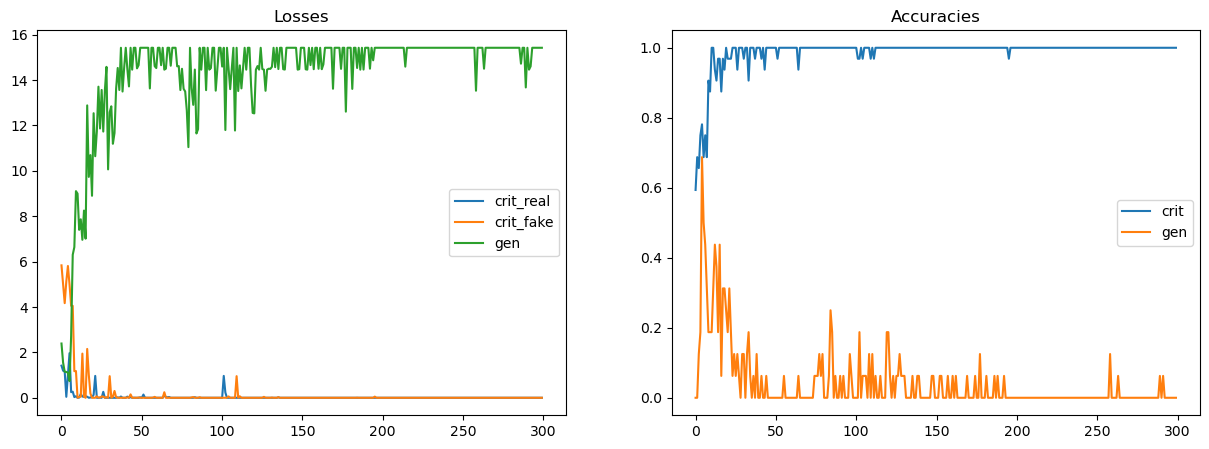

In [3]:
from evals_DCGAN2 import evals_DCGAN

# Creating GAN
evals_dcgan = evals_DCGAN()

# Training the GAN
evals_dcgan.train(evals_dataset=evals_dataset, n_epoch=300)

1/1 [==============================] - 0s 172ms/step
tf.Tensor(-4.4767175, shape=(), dtype=float32)
1/1 [==============================] - 0s 23ms/step
tf.Tensor(-2.434022, shape=(), dtype=float32)
1/1 [==============================] - 0s 23ms/step
tf.Tensor(-3.4932683, shape=(), dtype=float32)
1/1 [==============================] - 0s 22ms/step
tf.Tensor(-2.0689573, shape=(), dtype=float32)
1/1 [==============================] - 0s 47ms/step
tf.Tensor(-2.2082784, shape=(), dtype=float32)
1/1 [==============================] - 0s 24ms/step
tf.Tensor(-4.8846784, shape=(), dtype=float32)
1/1 [==============================] - 0s 21ms/step
tf.Tensor(-3.3448277, shape=(), dtype=float32)
1/1 [==============================] - 0s 25ms/step
tf.Tensor(-3.2038329, shape=(), dtype=float32)
1/1 [==============================] - 0s 25ms/step
tf.Tensor(-3.6754572, shape=(), dtype=float32)
1/1 [==============================] - 0s 21ms/step
tf.Tensor(-3.1678326, shape=(), dtype=float32)
1/1 [=====

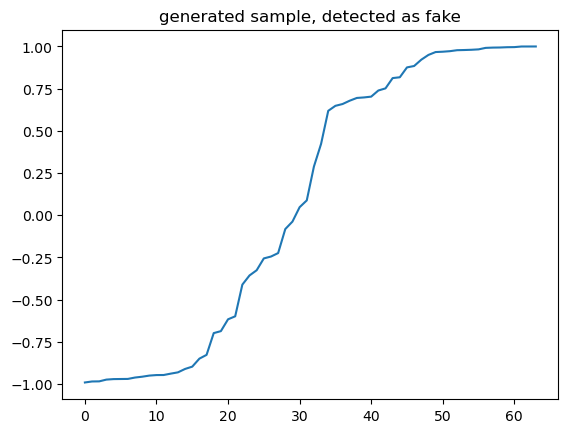

In [4]:
# Plotting sampled eigenvalues 
is_real, sample = evals_dcgan.get_evals()

if is_real:
    plt.title("generated sample, detected as real")
    plt.plot(np.sort(np.array(sample)[0]))
else:
    plt.title("generated sample, detected as fake")
    plt.plot(np.sort(np.array(sample)[0]))

### WGAN to generate eigenvectors 

In [ ]:
from evecs_WGAN2 import evecs_WGAN

# Creating WGAN
evecs_wgan = evecs_WGAN()

In [ ]:
evecs_wgan.train(evecs_dataset=evecs_dataset, n_epoch=1000)

In [ ]:
sample = evecs_wgan.get_evecs()